In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
# Load the dataset
data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [3]:
data 

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [5]:
data.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [ ]:
## Data Cleaning

In [53]:
#rename cols
data=data.rename(columns={"family_history_with_overweight": "Hist_Overweight",
                      "NObeyesdad": "Obesity_Level"})

In [54]:
data.isnull().sum()

Gender             0
Age                0
Height             0
Weight             0
Hist_Overweight    0
FAVC               0
FCVC               0
NCP                0
CAEC               0
SMOKE              0
CH2O               0
SCC                0
FAF                0
TUE                0
CALC               0
MTRANS             0
Obesity _Level     0
dtype: int64

In [55]:
data.dtypes

Gender              object
Age                  int32
Height             float64
Weight             float64
Hist_Overweight     object
FAVC                object
FCVC               float64
NCP                float64
CAEC                object
SMOKE               object
CH2O               float64
SCC                 object
FAF                float64
TUE                float64
CALC                object
MTRANS              object
Obesity _Level      object
dtype: object

In [56]:
print("   # of unique values for each column")
print("***************************************")
for column in data.columns:
    print(f"{column} --> {data[column].nunique()}")
    print("-------------------------")

   # of unique values for each column
***************************************
Gender --> 2
-------------------------
Age --> 40
-------------------------
Height --> 1574
-------------------------
Weight --> 1525
-------------------------
Hist_Overweight --> 2
-------------------------
FAVC --> 2
-------------------------
FCVC --> 810
-------------------------
NCP --> 635
-------------------------
CAEC --> 4
-------------------------
SMOKE --> 2
-------------------------
CH2O --> 1268
-------------------------
SCC --> 2
-------------------------
FAF --> 1190
-------------------------
TUE --> 1129
-------------------------
CALC --> 4
-------------------------
MTRANS --> 5
-------------------------
Obesity _Level --> 7
-------------------------


In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import warnings
from six.moves import urllib

warnings.filterwarnings("ignore")

%matplotlib inline

[Text(0.5, 1.0, 'Obesity Levels Distribution')]

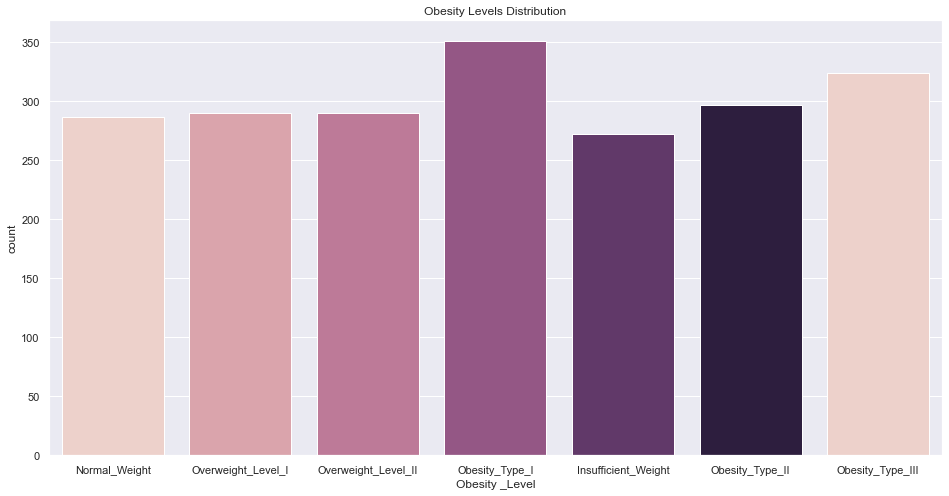

In [59]:
#class distribution of the target attribute -->> see target class is BALANCED
sns.set_style("dark")
sns.set(rc={'figure.figsize':(16,8)})
sns.countplot(x ='Obesity _Level', data=data, 
             # palette=sns.color_palette("Paired", 7), 
              palette=sns.cubehelix_palette(),
              saturation=10).set(title='Obesity Levels Distribution')

[Text(0.5, 1.0, 'Age distribution of the dataset')]

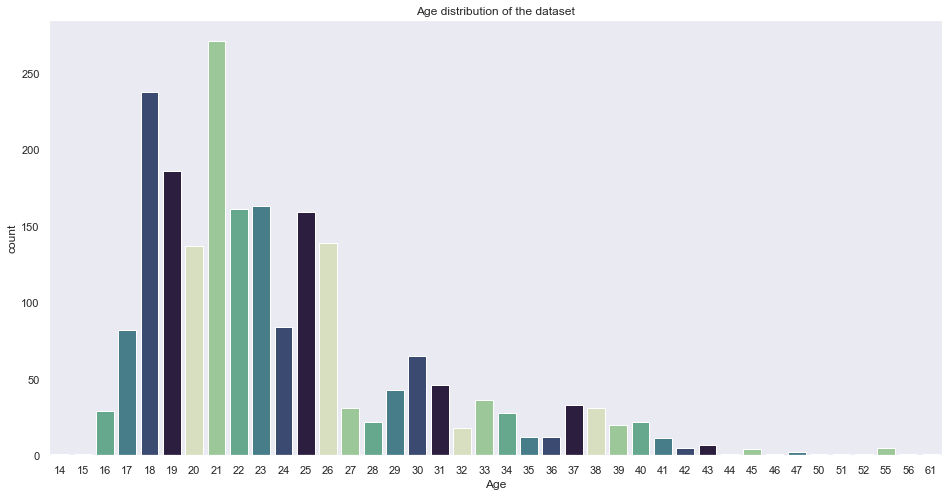

In [34]:
sns.set_style("dark")
sns.countplot(x="Age", data=data, 
              palette=sns.cubehelix_palette(start=.5, rot=-.75,), 
              saturation=1).set(title='Age distribution of the dataset')

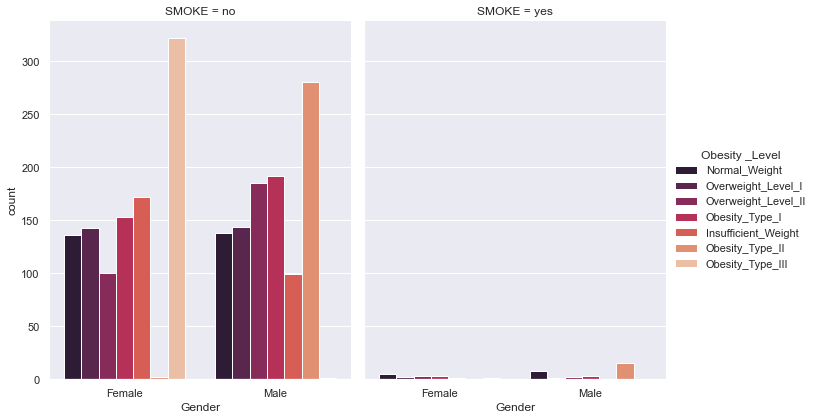

In [60]:
sns.catplot(x="Gender", hue="Obesity _Level", col="SMOKE",
                data=data, kind="count",
                height=6, aspect=.8,
                palette="rocket")

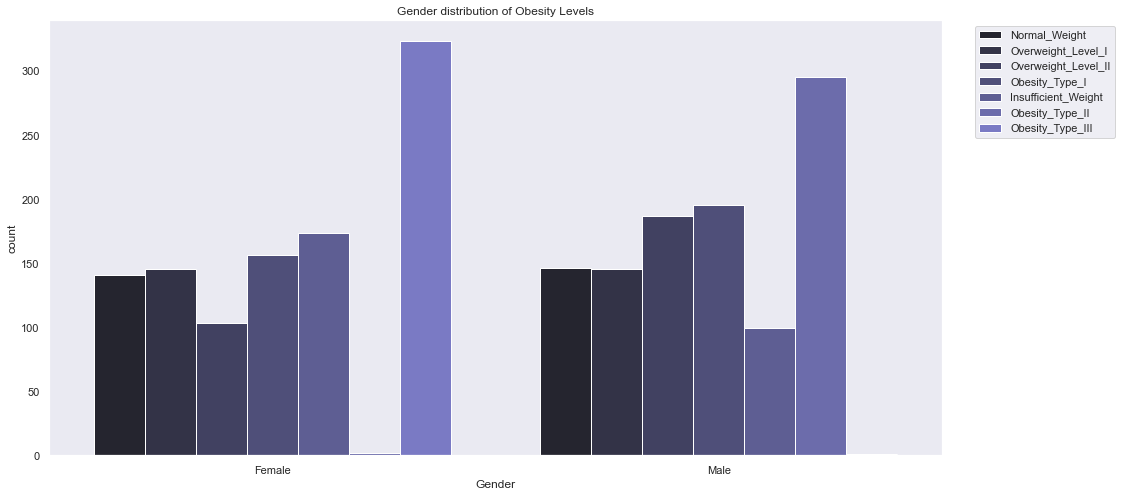

In [62]:
sns.set_style("dark")
sns.countplot(x="Gender", data=data, palette=sns.dark_palette("#88d", 8), 
              saturation=10, hue="Obesity _Level").set(title='Gender distribution of Obesity Levels')

plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.))

In [65]:
#outlier detection & handling (filling with mean)
cont_feature_col=["FCVC", "NCP", "CH2O", "FAF", "TUE", "Height", "Weight", "Age"]
cont_data=data[cont_feature_col]

# find the IQR
q1 = data[cont_feature_col].quantile(.25)
q3 = data[cont_feature_col].quantile(.75)
IQR = q3-q1

outliers_data = np.logical_or((data[cont_feature_col] < (q1 - 1.5 * IQR)), (data[cont_feature_col] > (q3 + 1.5 * IQR))) 

outlier_list=[]
total_outlier=[]
for col in list(outliers_data.columns):
    try:
        total_outlier.append(outliers_data[col].value_counts()[True])
        outlier_list.append((outliers_data[col].value_counts()[True] / outliers_data[col].value_counts().sum()) * 100)
    except:
        outlier_list.append(0)
        total_outlier.append(0)
        
outlier_list

outlier_data=pd.DataFrame(zip(list(outliers_data.columns), total_outlier, outlier_list), columns=['name of the column', 'total', 'outlier(%)'])

#see totally how many outliers in cont features
outlier_data.set_index('name of the column', inplace=True)
#del outlier_df.index.name
outlier_data

,total,outlier(%)
name of the column,,
FCVC,0,0.000000
NCP,579,27.427759
CH2O,0,0.000000
FAF,0,0.000000
TUE,0,0.000000
Height,1,0.047371
Weight,1,0.047371
Age,147,6.963524


In [67]:
data_cont=data[cont_feature_col]
out_nan_data=data_cont[~outliers_data]
out_nan_data

,FCVC,NCP,CH2O,FAF,TUE,Height,Weight,Age
0,2.0,3.0,2.000000,0.000000,1.000000,1.620000,64.000000,21.0
1,3.0,3.0,3.000000,3.000000,0.000000,1.520000,56.000000,21.0
2,2.0,3.0,2.000000,2.000000,1.000000,1.800000,77.000000,23.0
3,3.0,3.0,2.000000,2.000000,0.000000,1.800000,87.000000,27.0
4,2.0,NaN,2.000000,0.000000,0.000000,1.780000,89.800000,22.0
...,...,...,...,...,...,...,...,...
2106,3.0,3.0,1.728139,1.676269,0.906247,1.710730,131.408528,20.0
2107,3.0,3.0,2.005130,1.341390,0.599270,1.748584,133.742943,21.0
2108,3.0,3.0,2.054193,1.414209,0.646288,1.752206,133.689352,22.0
2109,3.0,3.0,2.852339,1.139107,0.586035,1.739450,133.346641,24.0


In [69]:
for col in cont_feature_col:
    col_mean=data[col].mean() #calculate mean for each col
    out_nan_data[col]=out_nan_data[col].fillna(col_mean) #first convert outliers to Nan values then fill Nan's with col mean

In [71]:
data_only_cat=data.drop(columns=cont_feature_col)
#concat data_only_cat and clear cont_data of outliers
data_final=pd.concat([out_nan_data, data_only_cat], axis=1)
data_final

,FCVC,NCP,CH2O,FAF,TUE,Height,Weight,Age,Gender,Hist_Overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,Obesity _Level
0,2.0,3.000000,2.000000,0.000000,1.000000,1.620000,64.000000,21.0,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight
1,3.0,3.000000,3.000000,3.000000,0.000000,1.520000,56.000000,21.0,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight
2,2.0,3.000000,2.000000,2.000000,1.000000,1.800000,77.000000,23.0,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight
3,3.0,3.000000,2.000000,2.000000,0.000000,1.800000,87.000000,27.0,Male,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I
4,2.0,2.685628,2.000000,0.000000,0.000000,1.780000,89.800000,22.0,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,3.0,3.000000,1.728139,1.676269,0.906247,1.710730,131.408528,20.0,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2107,3.0,3.000000,2.005130,1.341390,0.599270,1.748584,133.742943,21.0,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2108,3.0,3.000000,2.054193,1.414209,0.646288,1.752206,133.689352,22.0,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2109,3.0,3.000000,2.852339,1.139107,0.586035,1.739450,133.346641,24.0,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III


In [72]:
#split here for test - size=400

data_test=data_final.sample(n = 400)
ind=data_test.index

ind_list=ind.to_list()
data_train=data_final.drop(ind_list)

print("train", data_train.shape)
print("test", data_test.shape)

train (1711, 17)
test (400, 17)


In [73]:
data_train.reset_index(inplace=True)
data_test.reset_index(inplace=True)

In [74]:
data_train.reset_index(inplace=True)
data_train=data_train.drop(columns='index')
data_train=data_train.drop(columns='level_0')

data_test.reset_index(inplace=True)
data_test=data_test.drop(columns='index')
data_test=data_test.drop(columns='level_0')

In [75]:
data_train

,FCVC,NCP,CH2O,FAF,TUE,Height,Weight,Age,Gender,Hist_Overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,Obesity _Level
0,2.0,3.000000,2.000000,0.000000,1.000000,1.620000,64.000000,21.0,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight
1,3.0,3.000000,3.000000,3.000000,0.000000,1.520000,56.000000,21.0,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight
2,2.0,3.000000,2.000000,2.000000,1.000000,1.800000,77.000000,23.0,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight
3,3.0,3.000000,2.000000,2.000000,0.000000,1.800000,87.000000,27.0,Male,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I
4,2.0,2.685628,2.000000,0.000000,0.000000,1.780000,89.800000,22.0,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1706,3.0,3.000000,1.728139,1.676269,0.906247,1.710730,131.408528,20.0,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
1707,3.0,3.000000,2.005130,1.341390,0.599270,1.748584,133.742943,21.0,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
1708,3.0,3.000000,2.054193,1.414209,0.646288,1.752206,133.689352,22.0,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
1709,3.0,3.000000,2.852339,1.139107,0.586035,1.739450,133.346641,24.0,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III


In [76]:
data_test

,FCVC,NCP,CH2O,FAF,TUE,Height,Weight,Age,Gender,Hist_Overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,Obesity _Level
0,1.952987,2.685628,1.334856,0.732276,1.890214,1.618683,67.193585,17.000000,Female,yes,yes,Sometimes,no,yes,no,Public_Transportation,Overweight_Level_I
1,2.141280,2.989112,2.519841,2.111370,0.013483,1.611058,84.191125,23.000000,Female,yes,yes,Sometimes,no,no,no,Public_Transportation,Obesity_Type_I
2,3.000000,3.000000,1.651462,1.655993,0.939982,1.719913,131.567481,21.000000,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
3,2.689577,2.714115,2.279214,0.970661,0.828549,1.708800,83.520113,24.000000,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II
4,2.000000,3.000000,1.630528,0.000000,0.000000,1.559499,77.268130,23.972525,Female,yes,yes,Sometimes,no,no,Sometimes,Automobile,Obesity_Type_I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,2.000000,3.000000,2.000000,0.067491,0.894105,1.710616,99.860254,17.000000,Male,yes,yes,Sometimes,no,no,no,Public_Transportation,Obesity_Type_I
396,1.303878,3.000000,1.755497,0.062932,1.672532,1.708107,51.314659,18.000000,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Insufficient_Weight
397,2.000000,2.685628,1.000000,1.000000,0.000000,1.550000,58.000000,21.000000,Female,no,yes,Sometimes,no,no,Sometimes,Public_Transportation,Normal_Weight
398,3.000000,2.685628,3.000000,2.000000,1.000000,1.650000,88.000000,21.000000,Female,yes,yes,Sometimes,no,no,no,Public_Transportation,Obesity_Type_I


In [78]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

In [79]:
#encoding
ord_feature_list=["Gender", "Hist_Overweight", "SMOKE", "MTRANS", "SCC", "CALC", "CAEC", "FAVC", "Obesity _Level"]
data_ord=data_train[ord_feature_list]
col_names_list=data_ord.columns

enc = OrdinalEncoder()
enc.fit(data_ord)
data_ord_arr=enc.transform(data_ord)

encoded_cat_data=pd.DataFrame(data_ord_arr, columns=col_names_list)

In [82]:
#concat cat & cont dataframes
cont_feature_list=["FCVC", "NCP", "CH2O", "FAF", "TUE", "Height", "Weight", "Age"]
data_cont=data_train[cont_feature_list]

train_data_final = pd.concat([encoded_cat_data, data_cont], axis=1)

In [84]:
##X, y splitting
y_imp = train_data_final.loc[:, 'Obesity _Level'].values
X_imp = train_data_final.drop('Obesity _Level', axis=1)


In [86]:
# split df to X and Y
from sklearn.model_selection import train_test_split

y = train_data_final.loc[:, 'Obesity _Level'].values
X = train_data_final.drop('Obesity _Level', axis=1)

# split data into 80-20 for training set / test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state=100)

In [91]:
#normalization(make all values bet. 0-1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_normalized_arr=scaler.transform(X_train)
X_train_normalized_data=pd.DataFrame(X_train_normalized_arr, columns=X_train.columns.to_list())

X_test_normalized_arr=scaler.transform(X_test)
X_test_normalized_data=pd.DataFrame(X_test_normalized_arr, columns=X_test.columns.to_list())

In [92]:
X_train_normalized_data

,Gender,Hist_Overweight,SMOKE,MTRANS,SCC,CALC,CAEC,FAVC,FCVC,NCP,CH2O,FAF,TUE,Height,Weight,Age
0,0.0,1.0,0.0,0.75,0.0,0.5,0.666667,1.0,1.000000,0.631292,0.693995,0.283572,0.328246,0.715317,0.905537,0.272727
1,0.0,1.0,0.0,0.00,0.0,0.5,0.666667,1.0,0.500000,0.631292,0.903461,0.000000,0.000000,0.286116,0.301458,0.453297
2,1.0,1.0,0.0,0.75,0.0,0.5,0.666667,1.0,0.598631,0.631292,0.055920,0.302281,0.488237,0.933214,0.720724,0.727273
3,1.0,1.0,0.0,0.75,0.0,0.5,0.666667,1.0,0.805924,0.444523,0.682424,0.380569,0.031503,0.693251,0.649861,0.454545
4,1.0,0.0,0.0,0.75,0.0,0.5,0.000000,1.0,0.500000,0.631292,0.000000,0.333333,0.500000,0.482503,0.166591,0.227273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,0.0,1.0,0.0,0.75,0.0,0.5,0.666667,1.0,1.000000,0.631292,0.149597,0.078101,0.473444,0.474528,0.521764,0.500000
1364,0.0,1.0,0.0,0.75,0.0,0.5,0.666667,1.0,1.000000,0.631292,0.652787,0.578141,0.431522,0.720438,0.884649,0.227273
1365,1.0,1.0,0.0,0.00,0.0,1.0,0.666667,1.0,0.668022,0.397056,0.500000,0.666667,0.066503,0.700926,0.163519,0.136364
1366,1.0,1.0,0.0,0.75,0.0,1.0,0.666667,1.0,0.500000,0.397056,0.595700,0.333333,0.838472,0.792548,0.556854,0.181818


In [93]:
X_test_normalized_data

,Gender,Hist_Overweight,SMOKE,MTRANS,SCC,CALC,CAEC,FAVC,FCVC,NCP,CH2O,FAF,TUE,Height,Weight,Age
0,1.0,1.0,0.0,0.75,0.0,1.0,0.666667,1.0,0.500000,0.631292,0.700657,0.963995,0.000000,0.700341,0.513302,0.272727
1,1.0,1.0,0.0,0.00,0.0,1.0,0.666667,1.0,0.500000,0.397056,0.578698,0.666667,0.839575,0.637980,0.132483,0.227273
2,0.0,1.0,0.0,0.75,0.0,0.5,0.666667,1.0,1.000000,0.631292,0.946531,0.469392,0.403728,0.626798,0.752860,0.318182
3,1.0,1.0,0.0,0.00,0.0,0.5,0.666667,1.0,0.577591,0.631292,0.524539,0.000000,0.874960,0.674051,0.584979,0.590909
4,0.0,1.0,0.0,0.75,0.0,0.5,0.666667,1.0,1.000000,0.631292,0.479644,0.477717,0.455668,0.614138,0.752598,0.318182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,0.0,1.0,0.0,0.00,0.0,0.5,0.666667,1.0,0.942589,0.305608,0.008503,0.196224,0.458145,0.394085,0.278821,0.818182
339,1.0,1.0,0.0,0.00,0.0,0.5,0.666667,1.0,0.985491,0.631292,0.914430,0.151648,0.957909,0.631609,0.637591,0.772727
340,1.0,1.0,0.0,0.00,0.0,0.5,0.666667,1.0,0.983650,0.631292,0.765017,0.348369,0.473933,0.734505,0.645736,0.636364
341,1.0,0.0,0.0,0.00,0.0,1.0,0.666667,1.0,0.297873,0.397056,0.137194,0.501334,0.185033,0.650688,0.381336,0.681818


In [94]:
#import necessary libraries
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, classification_report, roc_auc_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, CategoricalNB
from sklearn.svm import LinearSVC,SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [95]:
# cross-validation with 10 splits
cv = StratifiedShuffleSplit(n_splits=10, random_state = 42, test_size=0.2)

#### Classifier-1: Decision Tree CART

In [96]:
# CART decision tree
cart = DecisionTreeClassifier(random_state = 0)


In [97]:
# parameters 
parameters = {
                "criterion": ["gini","entropy"],
                "splitter": ["best","random"],
                "class_weight": [None, "balanced"],
                }

# grid search for parameters
grid_1 = GridSearchCV(estimator=cart, param_grid=parameters, cv=cv, n_jobs=-1)
grid_1.fit(X_train_normalized_df, y_train)



GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=42, test_size=0.2,
            train_size=None),
             estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'splitter': ['best', 'random']})

In [100]:
# print best scores
print("The best parameters are %s with a score of %0.4f"
      % (grid_1.best_params_, grid_1.best_score_))

# prediction results
y_pred = grid_1.predict(X_test_normalized_data)

# print accuracy metrics
results, false =(y_test, y_pred)
print(results)

The best parameters are {'class_weight': None, 'criterion': 'entropy', 'splitter': 'best'} with a score of 0.9314
[2. 0. 4. 3. 4. 5. 6. 2. 2. 1. 5. 6. 3. 2. 6. 1. 2. 5. 0. 3. 2. 2. 6. 6.
 5. 4. 1. 5. 0. 6. 1. 3. 2. 3. 4. 4. 1. 0. 5. 0. 1. 6. 3. 4. 5. 6. 3. 4.
 4. 4. 3. 3. 2. 6. 1. 5. 2. 6. 5. 0. 5. 6. 2. 6. 5. 3. 1. 0. 0. 3. 5. 0.
 5. 4. 3. 0. 4. 6. 3. 6. 4. 4. 1. 0. 4. 0. 4. 3. 3. 1. 4. 2. 6. 4. 6. 5.
 2. 0. 1. 0. 3. 6. 5. 2. 0. 2. 0. 4. 0. 2. 4. 2. 3. 0. 0. 1. 2. 6. 1. 2.
 3. 4. 1. 5. 4. 6. 1. 0. 5. 4. 0. 3. 1. 5. 4. 6. 5. 3. 0. 1. 1. 0. 0. 4.
 3. 6. 5. 6. 1. 2. 4. 2. 1. 3. 0. 3. 1. 1. 4. 2. 2. 5. 6. 4. 4. 1. 4. 4.
 3. 5. 5. 5. 0. 6. 4. 1. 3. 1. 1. 3. 2. 4. 0. 1. 1. 1. 4. 1. 6. 1. 6. 6.
 6. 1. 4. 2. 6. 2. 2. 4. 1. 4. 5. 3. 2. 1. 2. 2. 0. 5. 2. 2. 2. 4. 1. 5.
 1. 2. 6. 5. 4. 2. 2. 0. 1. 6. 6. 0. 5. 2. 2. 1. 2. 5. 6. 1. 6. 5. 5. 5.
 3. 0. 4. 5. 5. 0. 4. 1. 6. 6. 0. 6. 5. 6. 0. 3. 4. 6. 4. 1. 2. 4. 3. 2.
 3. 0. 3. 2. 2. 6. 6. 2. 2. 3. 3. 4. 2. 2. 0. 2. 2. 4. 5. 6. 0. 2. 6. 5.
 3. 5. 0. 

#### Classifier-2: Logistic Regression

In [101]:
logit = LogisticRegression(random_state=0)
# parameters 
parameters = {
                "penalty":['l1', 'l2'],
                "C": [0.01, 0.1, 1, 10, 100],
                "max_iter": [100,1000,5000],
             }


In [104]:
# grid search for parameters
grid_5 = GridSearchCV(estimator=logit, param_grid=parameters, cv=cv, n_jobs=-1)
grid_5.fit(X_train_normalized_data, y_train)

# print best scores
print("The best parameters are %s with a score of %0.4f\n"
      % (grid_5.best_params_, grid_5.best_score_))



The best parameters are {'C': 100, 'max_iter': 1000, 'penalty': 'l2'} with a score of 0.9011



In [106]:
# prediction results
y_pred = grid_5.predict(X_test_normalized_data)

# print accuracy metrics
results, false =(y_test, y_pred)
print(results)

[2. 0. 4. 3. 4. 5. 6. 2. 2. 1. 5. 6. 3. 2. 6. 1. 2. 5. 0. 3. 2. 2. 6. 6.
 5. 4. 1. 5. 0. 6. 1. 3. 2. 3. 4. 4. 1. 0. 5. 0. 1. 6. 3. 4. 5. 6. 3. 4.
 4. 4. 3. 3. 2. 6. 1. 5. 2. 6. 5. 0. 5. 6. 2. 6. 5. 3. 1. 0. 0. 3. 5. 0.
 5. 4. 3. 0. 4. 6. 3. 6. 4. 4. 1. 0. 4. 0. 4. 3. 3. 1. 4. 2. 6. 4. 6. 5.
 2. 0. 1. 0. 3. 6. 5. 2. 0. 2. 0. 4. 0. 2. 4. 2. 3. 0. 0. 1. 2. 6. 1. 2.
 3. 4. 1. 5. 4. 6. 1. 0. 5. 4. 0. 3. 1. 5. 4. 6. 5. 3. 0. 1. 1. 0. 0. 4.
 3. 6. 5. 6. 1. 2. 4. 2. 1. 3. 0. 3. 1. 1. 4. 2. 2. 5. 6. 4. 4. 1. 4. 4.
 3. 5. 5. 5. 0. 6. 4. 1. 3. 1. 1. 3. 2. 4. 0. 1. 1. 1. 4. 1. 6. 1. 6. 6.
 6. 1. 4. 2. 6. 2. 2. 4. 1. 4. 5. 3. 2. 1. 2. 2. 0. 5. 2. 2. 2. 4. 1. 5.
 1. 2. 6. 5. 4. 2. 2. 0. 1. 6. 6. 0. 5. 2. 2. 1. 2. 5. 6. 1. 6. 5. 5. 5.
 3. 0. 4. 5. 5. 0. 4. 1. 6. 6. 0. 6. 5. 6. 0. 3. 4. 6. 4. 1. 2. 4. 3. 2.
 3. 0. 3. 2. 2. 6. 6. 2. 2. 3. 3. 4. 2. 2. 0. 2. 2. 4. 5. 6. 0. 2. 6. 5.
 3. 5. 0. 1. 6. 0. 2. 3. 3. 3. 4. 3. 2. 2. 3. 6. 5. 0. 2. 4. 5. 0. 4. 5.
 4. 1. 1. 0. 5. 0. 5. 4. 4. 1. 6. 6. 5. 3. 4. 3. 1.

#### Classifier-3:RandomForest

In [113]:
rf = RandomForestClassifier(random_state=0)

# parameters 
parameters = {
                "bootstrap": ["True","False"],
                "max_features": [None, "sqrt", "log2"],
                "class_weight": [None, "balanced", "balanced_subsample"],
                "max_samples": [None, 0.3, 0.5, 0.7, 0.9],
                "n_estimators": [10, 100, 200]
                
}


In [114]:
# grid search for parameters
grid_6 = GridSearchCV(estimator=rf, param_grid=parameters, cv=cv, n_jobs=-1)
grid_6.fit(X_train_normalized_data, y_train)

# print best scores
print("The best parameters are %s with a score of %0.4f"
      % (grid_6.best_params_, grid_6.best_score_))



The best parameters are {'bootstrap': 'True', 'class_weight': None, 'max_features': None, 'max_samples': None, 'n_estimators': 200} with a score of 0.9489


In [115]:
# prediction results
y_pred = grid_6.predict(X_test_normalized_data)

# print accuracy metrics
results, false =(y_test, y_pred)
print(results)

[2. 0. 4. 3. 4. 5. 6. 2. 2. 1. 5. 6. 3. 2. 6. 1. 2. 5. 0. 3. 2. 2. 6. 6.
 5. 4. 1. 5. 0. 6. 1. 3. 2. 3. 4. 4. 1. 0. 5. 0. 1. 6. 3. 4. 5. 6. 3. 4.
 4. 4. 3. 3. 2. 6. 1. 5. 2. 6. 5. 0. 5. 6. 2. 6. 5. 3. 1. 0. 0. 3. 5. 0.
 5. 4. 3. 0. 4. 6. 3. 6. 4. 4. 1. 0. 4. 0. 4. 3. 3. 1. 4. 2. 6. 4. 6. 5.
 2. 0. 1. 0. 3. 6. 5. 2. 0. 2. 0. 4. 0. 2. 4. 2. 3. 0. 0. 1. 2. 6. 1. 2.
 3. 4. 1. 5. 4. 6. 1. 0. 5. 4. 0. 3. 1. 5. 4. 6. 5. 3. 0. 1. 1. 0. 0. 4.
 3. 6. 5. 6. 1. 2. 4. 2. 1. 3. 0. 3. 1. 1. 4. 2. 2. 5. 6. 4. 4. 1. 4. 4.
 3. 5. 5. 5. 0. 6. 4. 1. 3. 1. 1. 3. 2. 4. 0. 1. 1. 1. 4. 1. 6. 1. 6. 6.
 6. 1. 4. 2. 6. 2. 2. 4. 1. 4. 5. 3. 2. 1. 2. 2. 0. 5. 2. 2. 2. 4. 1. 5.
 1. 2. 6. 5. 4. 2. 2. 0. 1. 6. 6. 0. 5. 2. 2. 1. 2. 5. 6. 1. 6. 5. 5. 5.
 3. 0. 4. 5. 5. 0. 4. 1. 6. 6. 0. 6. 5. 6. 0. 3. 4. 6. 4. 1. 2. 4. 3. 2.
 3. 0. 3. 2. 2. 6. 6. 2. 2. 3. 3. 4. 2. 2. 0. 2. 2. 4. 5. 6. 0. 2. 6. 5.
 3. 5. 0. 1. 6. 0. 2. 3. 3. 3. 4. 3. 2. 2. 3. 6. 5. 0. 2. 4. 5. 0. 4. 5.
 4. 1. 1. 0. 5. 0. 5. 4. 4. 1. 6. 6. 5. 3. 4. 3. 1.

#### Classifier-4: SVM

In [116]:
# SVM classifier
svm = SVC(tol=1e-5, random_state=0)

# parameters 
parameters = {
                'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                'C': [0.01, 0.1, 1, 10, 100],
                'max_iter': [100, 1000, 5000]
            }


In [117]:
# grid search for parameters
grid_3 = GridSearchCV(estimator=svm, param_grid=parameters, cv=cv, n_jobs=-1)
grid_3.fit(X_train_normalized_data, y_train)

# print best scores
print("The best parameters are %s with a score of %0.4f\n"
      % (grid_3.best_params_, grid_3.best_score_))



The best parameters are {'C': 100, 'kernel': 'linear', 'max_iter': 5000} with a score of 0.9573



In [118]:
# prediction results
y_pred = grid_3.predict(X_test_normalized_data)

# print accuracy metrics
results, false = (y_test, y_pred)
print(results)

[2. 0. 4. 3. 4. 5. 6. 2. 2. 1. 5. 6. 3. 2. 6. 1. 2. 5. 0. 3. 2. 2. 6. 6.
 5. 4. 1. 5. 0. 6. 1. 3. 2. 3. 4. 4. 1. 0. 5. 0. 1. 6. 3. 4. 5. 6. 3. 4.
 4. 4. 3. 3. 2. 6. 1. 5. 2. 6. 5. 0. 5. 6. 2. 6. 5. 3. 1. 0. 0. 3. 5. 0.
 5. 4. 3. 0. 4. 6. 3. 6. 4. 4. 1. 0. 4. 0. 4. 3. 3. 1. 4. 2. 6. 4. 6. 5.
 2. 0. 1. 0. 3. 6. 5. 2. 0. 2. 0. 4. 0. 2. 4. 2. 3. 0. 0. 1. 2. 6. 1. 2.
 3. 4. 1. 5. 4. 6. 1. 0. 5. 4. 0. 3. 1. 5. 4. 6. 5. 3. 0. 1. 1. 0. 0. 4.
 3. 6. 5. 6. 1. 2. 4. 2. 1. 3. 0. 3. 1. 1. 4. 2. 2. 5. 6. 4. 4. 1. 4. 4.
 3. 5. 5. 5. 0. 6. 4. 1. 3. 1. 1. 3. 2. 4. 0. 1. 1. 1. 4. 1. 6. 1. 6. 6.
 6. 1. 4. 2. 6. 2. 2. 4. 1. 4. 5. 3. 2. 1. 2. 2. 0. 5. 2. 2. 2. 4. 1. 5.
 1. 2. 6. 5. 4. 2. 2. 0. 1. 6. 6. 0. 5. 2. 2. 1. 2. 5. 6. 1. 6. 5. 5. 5.
 3. 0. 4. 5. 5. 0. 4. 1. 6. 6. 0. 6. 5. 6. 0. 3. 4. 6. 4. 1. 2. 4. 3. 2.
 3. 0. 3. 2. 2. 6. 6. 2. 2. 3. 3. 4. 2. 2. 0. 2. 2. 4. 5. 6. 0. 2. 6. 5.
 3. 5. 0. 1. 6. 0. 2. 3. 3. 3. 4. 3. 2. 2. 3. 6. 5. 0. 2. 4. 5. 0. 4. 5.
 4. 1. 1. 0. 5. 0. 5. 4. 4. 1. 6. 6. 5. 3. 4. 3. 1.